# Test pour résoudre le problème de l'inversion matricielle de la régression multiple

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import math

In [29]:
def create_linear_model(input_dim: int):
    return [random.random() * 2 - 1 for i in range(input_dim + 1)]

def train_regression_linear_model(model, dataset_inputs: [float], dataset_expected_outputs:[float]):
    input_size =len(model) - 1
    sample_count = len(dataset_inputs) // (input_size)
    X = np.array(dataset_inputs)
    Y = np.array(dataset_expected_outputs)

    X = np.reshape(X, (sample_count, input_size))
    bias_fake_inputs = np.ones((sample_count, 1))

    X = np.hstack((bias_fake_inputs, X))
    Y = np.reshape(Y, (sample_count, 1))

    W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X) + 0.1*np.diag(np.ones(sample_count))), X.T), Y)
    print(W)
    try:
        W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)
    except:
        print(X)
        print(Y)
        print("Matrice non inversible")

    for i in range(len(model)):
        model[i] = W[i][0]
    
def predict_linear_model_regression(model: [float], inputs: [float]):
    sum_rslt = model[0]
    for i in range(1, len(model)):
        sum_rslt += model[i] * inputs[i - 1]
    return sum_rslt


In [12]:
def regression_fit(X, y):
    n, p = X.shape
    X = np.concatenate([np.ones((n,1)), X], axis=1)
    alpha = np.linalg.solve(X.T@X, X.T@y)
    return alpha

def regression_predict(X, alpha):
    return X@alpha[1:] + alpha[0]


# Result

In [6]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

[[0.0397088 ]
 [0.48974189]
 [0.48974189]]
[[1. 1. 1.]
 [1. 2. 2.]
 [1. 3. 3.]]
[[1]
 [2]
 [3]]
Matrice non inversible


<ipython-input-30-9f23af78932d>:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


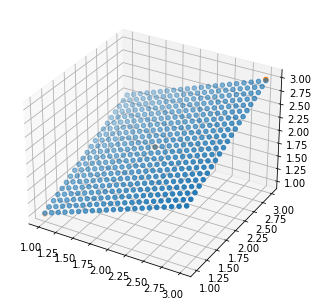

<Figure size 432x288 with 0 Axes>

In [30]:
from mpl_toolkits.mplot3d import Axes3D

model = create_linear_model(2)

# alpha = regression_fit(X, Y)
train_regression_linear_model(model, X.flatten(), Y)

points_x = []
points_y = []
points_z = []

for i in range(10, 31):
    for j in range(10, 31):
        points_x.append(float(i/10))
        points_y.append(float(j/10))
#         points_z.append(float(regression_predict([i/10, j/10], alpha)))
        points_z.append(float(predict_linear_model_regression(model, [i/10, j/10])))
        
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(points_x,points_y,points_z)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()
